# ***`Data Processing`***

In [ ]:
# import stuffs
import os
import cv2
import imghdr
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Cell 1A — mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import shutil
import os
from pathlib import Path

src = "/content/drive/MyDrive/dataset"
dst = "/content/dataset"

if os.path.exists(dst):
    shutil.rmtree(dst)

shutil.copytree(src, dst)
print("Dataset copied to:", dst)

data_dir = '/content/dataset'

data_path = Path(data_dir)
classes = sorted([p.name for p in data_path.iterdir() if p.is_dir()])
print("Classes found:", classes)

for c in classes:
    files = [f for f in (data_path / c).iterdir()
             if f.suffix.lower() in ('.jpg', '.jpeg', '.png')]
    print(f"{c}: {len(files)} images")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset copied to: /content/dataset
Classes found: ['cat', 'cow', 'dog', 'lamb', 'zebra']
cat: 100 images
cow: 100 images
dog: 100 images
lamb: 100 images
zebra: 100 images


In [ ]:
# 0 = cat
# 1 = cow
# 2 = dog
# 3 = lamb
# 4 = zebra

# data = tf.keras.utils.image_dataset_from_directory(data_path)
# data_iter = data.as_numpy_iterator()
# batch = data_iter.next()

# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

data = tf.keras.utils.image_dataset_from_directory(data_path)
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Found 500 files belonging to 5 classes.


# ***`Modeling `***

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,653 (14.11 MB)

 Trainable params: 3,697,653 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

# ***`Train`***

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])










Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.2183 - loss: 2.1215 - val_accuracy: 0.3958 - val_loss: 1.4915
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.4002 - loss: 1.3842 - val_accuracy: 0.4792 - val_loss: 1.3612
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.4747 - loss: 1.2205 - val_accuracy: 0.4688 - val_loss: 1.1979
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.5547 - loss: 1.0374 - val_accuracy: 0.6771 - val_loss: 0.8786
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.6154 - loss: 0.9168 - val_accuracy: 0.6458 - val_loss: 0.8082
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.7143 - loss: 0.7683 - val_accuracy: 0.8750 - val_loss: 0.5249
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8361 - loss: 0.5520 - val_accuracy: 0.7812 - val_loss: 0.4995
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.8428 - loss: 0.4476 - val_accuracy: 0.9062 - val_loss:

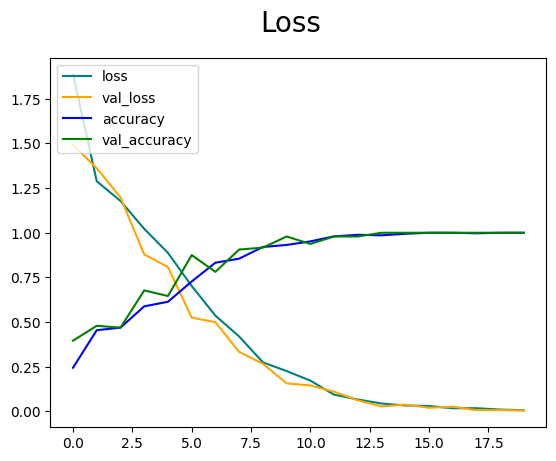

In [ ]:
hist.history
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# ***`Evaluate `***

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Collect all predictions and true labels
y_true = []
y_pred = []

for X, y in test.as_numpy_iterator():
    preds = model.predict(X)
    y_true.extend(y)      # true class indices
    y_pred.extend(np.argmax(preds, axis=1))  # predicted class indices

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report (precision, recall, f1 per class)
print(classification_report(y_true, y_pred, target_names=['cat','cow','dog','lamb','zebra']))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
              precision    recall  f1-score   support

         cat       1.00      1.00      1.00        16
         cow       1.00      1.00      1.00        12
         dog       1.00      1.00      1.00         9
        lamb       1.00      1.00      1.00         9
       zebra       1.00      1.00      1.00         6

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Confusion Matrix:
[[16  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0  6]]


# ***`Test`***

Saving images.jpeg to images.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Predicted Class: zebra


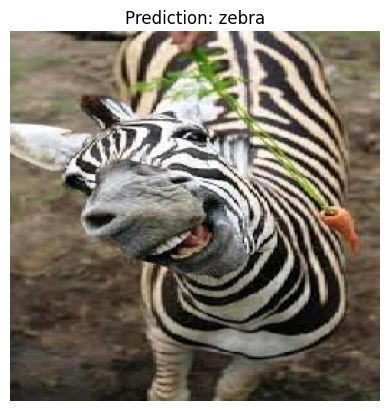

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Upload image
uploaded = files.upload()

# Class names (must match your dataset)
class_names = ['cat', 'cow', 'dog', 'lamb', 'zebra']

# Load image
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(256, 256))

# Preprocess
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]

# Print & show
print("Predicted Class:", pred_class)

plt.imshow(img)
plt.title(f"Prediction: {pred_class}")
plt.axis(False)
plt.show()
